In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/heartdisease_data.csv',names=range(0,14))  #Path location of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


As there are no names for the columns, we need to rename them

In [3]:
#Renaming Columns using rename function
import numpy as np
df.rename(columns={0:'age',1:'sex',2:'cp',3:'trestbps',4:'chol',5:'fbs',6:'restecg',7:'thalach',
                   8:'exang',9:'oldpeak',10:'slope',11:'ca',12:'thal',13:'target'},inplace=True)
df.head()  #Checking top 5 rows after renaming the columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
df.shape

(200, 14)

In [5]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Dataset Description
-> The given dataset tells the details of the patients who have heart disease or not, according to the given features.

-> We will try to use this data to predict whether a patient has heart disease or not.

-> There are 200 patient records in the dataset along with 14 columns and the description of the columns are given below:

1.age - age in years

2.sex - (1 = male; 0 = female)

3.cp - chest pain type

4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5.chol - serum cholestoral in mg/dl

6.fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7.restecg - resting electrocardiographic results

8.thalach - maximum heart rate achieved

9.exang - exercise induced angina (1 = yes; 0 = no)

10.oldpeak - ST depression induced by exercise relative to rest

11.slope - the slope of the peak exercise ST segment

12.ca - number of major vessels (0-3) colored by flourosopy

13.thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target - having disease or not (1=yes, 0=no)

Our agenda in this project
We need to predict whether a person has heart disease or not with the data given and since the target variable is of binary data, we need to approach classification analysis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Eventhough there are numeric data in the dataset, the datatype is in object and we need to convert that so that we can do further process

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Handling the dataframe
Eventhough there are no null values present, we can see that there are question marks '?' in many data and it means that there are missing values, although it is not considered as null values. We need to replace those values so that we can proceed with further analysis.

In [8]:
df=df.replace({'?': np.nan})

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [10]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64

After replacing ? with NaN values, we can see that there are missing data and we need to add values in them during further analysis

In [11]:
#We know that:
# 0 = absence of disease
# 1, 2, 3, 4 = presence of disease
#lets change all the 2,3,4 values to 1 in target so that it can help the model to classify easier
print(df['target'].value_counts())
df['target']=df['target'].replace(2,1)
df['target']=df['target'].replace(3,1)
df['target']=df['target'].replace(4,1)

1    56
0    51
3    42
2    41
4    10
Name: target, dtype: int64


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,1
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,1
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


We can see that all the target values are in binary format so that the classification process done by the model will be easier. Let's proceed with further data analysis.

In [13]:
#Converting the datatypes as we cannot do EDA with object type data
df=df.apply(pd.to_numeric,downcast='integer')

In [14]:
df.dtypes

age            int8
sex            int8
cp             int8
trestbps    float64
chol        float64
fbs         float64
restecg        int8
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target         int8
dtype: object

After conversion of datatypes, we can proceed with further analysis

Exploratory Data Analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

1    149
0     51
Name: target, dtype: int64




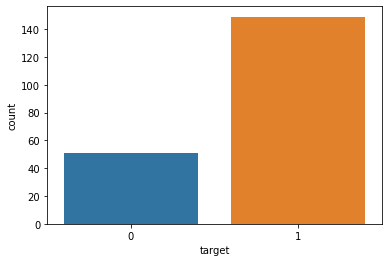

In [16]:
#Checking the number of people who are having heart diseases or not
print(df['target'].value_counts())
print('\n')
sns.countplot(x='target',data=df)   #Plotting the data using countplot
plt.show()

We can see that 149 people have heart diseases whereas 51 people don't have heart disease

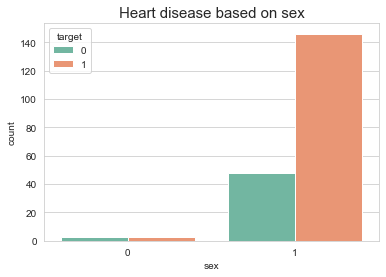

In [17]:
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.title('Heart disease based on sex',{'fontsize':15})
sns.countplot(x='sex',hue='target',data=df,palette="Set2")
plt.show()

 1 means male and 0 means female and from the graph we can see that more male patients have heart disease compared to female patients.

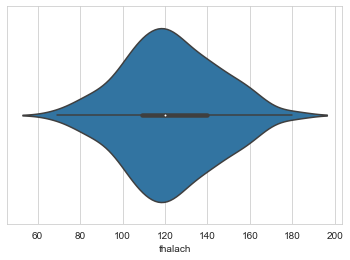

In [18]:
#Checking the distribution of heart rate using violin plot
sns.violinplot(df['thalach'])
plt.show()

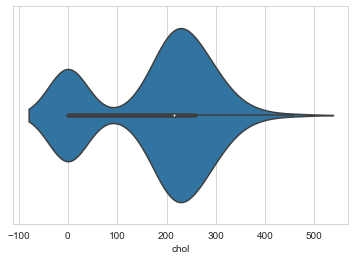

In [19]:
#Checking the distribution of cholestrol level using violin plot
sns.violinplot(df['chol'])
plt.show()

Bivariate Analysis

Text(0, 0.5, 'target')

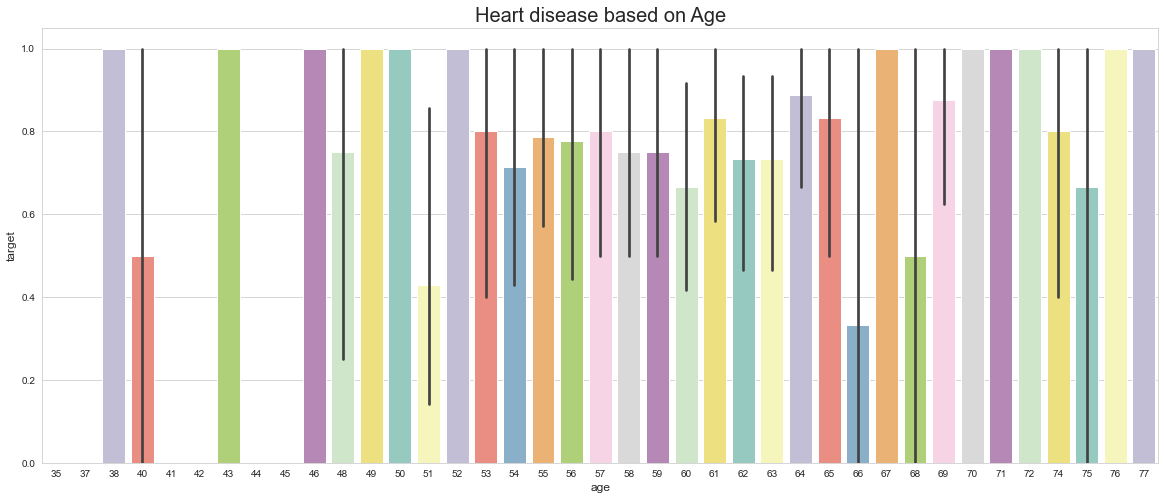

In [20]:
#Plotting heart disease based on age
plt.figure(figsize=(20,8))
plt.xticks(np.linspace(1,2,5))
plt.title('Heart disease based on Age',{'fontsize':20})
sns.barplot(x='age',y='target',palette="Set3",data=df)
plt.xlabel('age',{'fontsize' : 'large'})
plt.ylabel('target',{'fontsize':'large'})

We can see that the patients at age 38, 43, 46, 49, 50, 52, 67, 70, 71, 72, 76 and 77 are having the high risk of heart diseases. Age above 40+ are having high heart diseases rate.

<AxesSubplot:xlabel='slope', ylabel='oldpeak'>

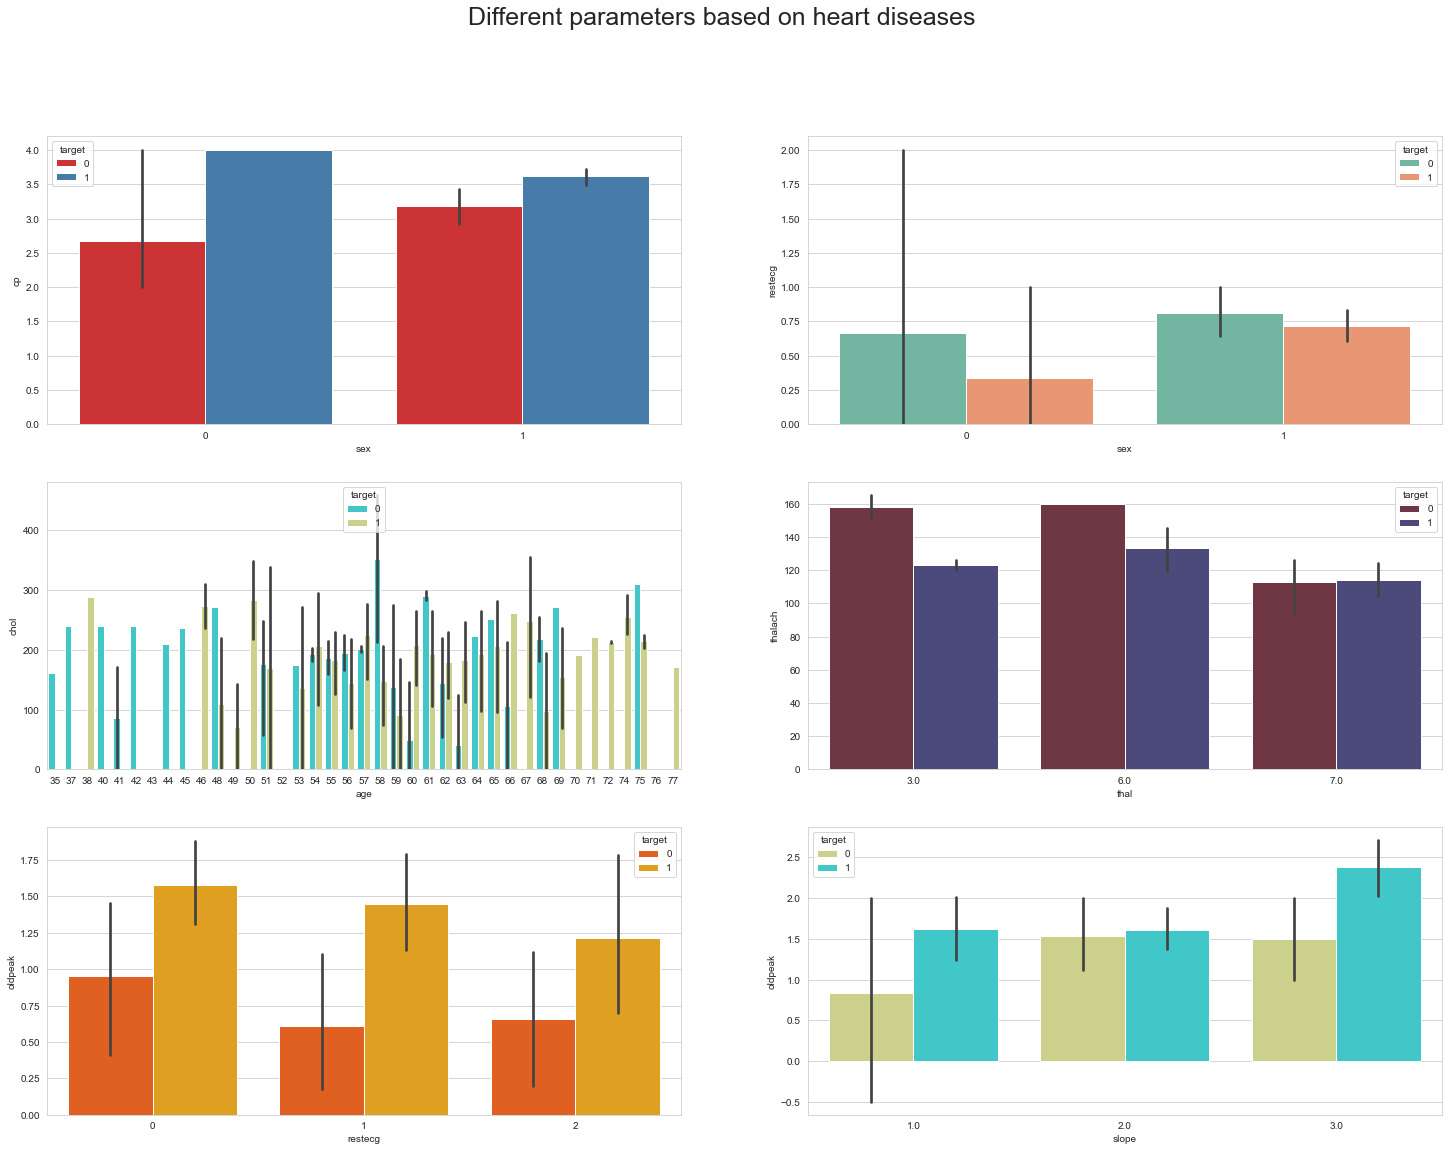

In [21]:
#Plotting different parameters based on heart diseases
fig,axes = plt.subplots(3, 2, figsize=(25, 18))    #axes is for giving dimensions to the figures we are plotting
#3 means 3 rows and 2 means 2 columns

fig.suptitle('Different parameters based on heart diseases',fontsize=25) #Adding a centered title to the figure using suptitle

#Plotting sex vs cp relationship using barplot
sns.barplot(ax=axes[0, 0],x='sex',y='cp',hue='target',data=df,palette="Set1")
#ax=axes[0,0] means we are plotting the figure on 0th row and 0th column

#Plotting sex vs restecg relationship using barplot
sns.barplot(ax=axes[0, 1],x='sex',y='restecg',hue='target',data=df,palette="Set2")
#ax=axes[0,1] means we are plotting the figure on 0th row and 1st column

#Plotting age vs chol relationship using barplot
sns.barplot(ax=axes[1, 0],x='age',y='chol',hue='target',data=df,palette="rainbow")
#ax=axes[1,0] means we are plotting the figure on 1st row and 0th column

#Plotting thal vs thalach relationship using barplot
sns.barplot(ax=axes[1, 1],x='thal',y='thalach',hue='target',data=df,palette="icefire_r")
#ax=axes[1,1] means we are plotting the figure on 1st row and 1st column

#Plotting restecg vs oldpeak relationship using barplot
sns.barplot(ax=axes[2, 0],x='restecg',y='oldpeak',hue='target',data=df,palette="autumn")
#ax=axes[2,0] means we are plotting the figure on 2nd row and 0th column

#Plotting slope vs oldpeak relationship using barplot
sns.barplot(ax=axes[2, 1],x='slope',y='oldpeak',hue='target',data=df,palette="rainbow_r")
#ax=axes[2,1] means we are plotting the figure on 2nd row and 1st column

Observations:

1.We can see that female patients are having more chest pain, when they have heart disease, compared to male patients. Male patients who don't have any heart diseases are having less chest pain.

2.The restecg results of male patients who don't have heart diseases are normal, whereas for female patients who have heart diseases are having less value, which means the risk is higher for them.

3.The cholestrol level should not be more than 200mg/dl and we can see that many patients have high cholestrol which is one of the main factor for getting heart diseases.

4.The heart rate for patients who are not having heart diseases is higher for thal=3.0 and 6.0, wherease for thal=7.0 both heart and non-heart disease patients is equal.

5.We can observe that if ST depression induced by exercise relative to rest in patients, we can observe more case of ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) in the patient.

6.We can see that the slope of the peak exercise ST segment is more for heart disease patients.

7.From the graphical representations, we can see that female patients are in high risk of getting heart diseases.

Multivariate Analysis

In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,2.0,34.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,0.745000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.0,1.291685,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,0.0,7.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,1.000000


Observations:

1.The minimum age of the person is 35 and the maximum age of the person is 77.

2.There is not much difference between the mean and median.

3.In columns like trestbps, chol and thalach the difference between 75th percentile and max is large and it is due to the presence of outliers.

4.The min value for most of the columns is 0.

In [23]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.034230,-0.038280,0.210980,0.069138,0.127817,0.002400,-0.174125,0.156823,0.183086,0.148603,NaN,0.176430,0.189692
sex,0.034230,1.000000,0.038036,0.013820,-0.096204,-0.055372,0.060621,-0.001747,0.018155,0.106811,0.124613,NaN,-0.138675,0.098854
cp,-0.038280,0.038036,1.000000,0.097246,0.066279,-0.047701,0.034790,-0.160306,0.235935,0.055933,0.047762,NaN,0.213339,0.256614
trestbps,0.210980,0.013820,0.097246,1.000000,0.176922,0.226024,0.106918,-0.013177,0.222550,0.118022,0.109788,NaN,0.230130,0.096073
chol,0.069138,-0.096204,0.066279,0.176922,1.000000,0.160850,0.025154,-0.048269,0.102016,0.001549,0.080450,NaN,-0.171315,0.019060
fbs,0.127817,-0.055372,-0.047701,0.226024,0.160850,1.000000,0.167657,0.061682,-0.259299,-0.122122,0.023457,NaN,0.059924,0.089535
restecg,0.002400,0.060621,0.034790,0.106918,0.025154,0.167657,1.000000,0.014274,-0.093141,-0.123890,-0.027817,NaN,0.110871,-0.059146
thalach,-0.174125,-0.001747,-0.160306,-0.013177,-0.048269,0.061682,0.014274,1.000000,-0.075057,0.179167,-0.164124,NaN,-0.414599,-0.051548
exang,0.156823,0.018155,0.235935,0.222550,0.102016,-0.259299,-0.093141,-0.075057,1.000000,0.314143,0.149392,NaN,0.258353,0.299270
oldpeak,0.183086,0.106811,0.055933,0.118022,0.001549,-0.122122,-0.123890,0.179167,0.314143,1.000000,0.331319,NaN,0.209410,0.268736


We can see that ca values are having more missing data and also it is not even correlated with target. Therefore, we can drop that column.

In [24]:
df.drop('ca',axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,0


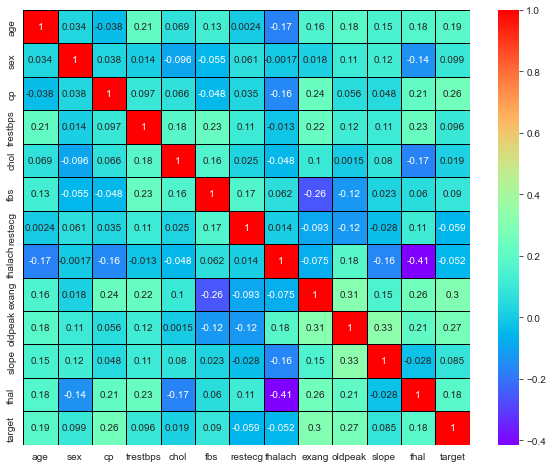

In [25]:
#Plotting heatmap to understand the visualization of correlation
corr=df.corr()   #Finding correlation after dropping ca column
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',cmap='rainbow',annot=True)
plt.show()

Observations:

1.We can see that nearly 90% of the data is positively correlated with each other.

2.oldpeak and slope column have the highest positve correlation with each other at a value of 33%.

3.thal and thalach have the highest negative correlation with each other at a value of -41%.

4.Positive correlated columns have high impact with the target variable, whereas negatively correlated column has less or zero impact with the target variable.


Handling missing data

In [26]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
thal        166
target        0
dtype: int64

As there are missing data present in the dataset, we need to fill them with values. It can be done by using SimpleImputer Library.

In [27]:
#Importing SimpleImputer
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='median')  #Using median values to replace missing data

#Replacing the missing values in the required columns
df['trestbps']=SI.fit_transform(df['trestbps'].values.reshape(-1,1))
df['chol']=SI.fit_transform(df['chol'].values.reshape(-1,1))
df['fbs']=SI.fit_transform(df['fbs'].values.reshape(-1,1))
df['thalach']=SI.fit_transform(df['thalach'].values.reshape(-1,1))
df['exang']=SI.fit_transform(df['exang'].values.reshape(-1,1))
df['oldpeak']=SI.fit_transform(df['oldpeak'].values.reshape(-1,1))
df['slope']=SI.fit_transform(df['slope'].values.reshape(-1,1))
df['thal']=SI.fit_transform(df['thal'].values.reshape(-1,1))
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,7.0,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,7.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,7.0,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,7.0,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,2.0,7.0,1
196,62,1,1,130.0,139.0,0.0,1,120.0,1.0,1.5,2.0,7.0,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2.0,6.0,1
198,58,1,4,130.0,385.0,1.0,2,120.0,1.0,1.5,2.0,7.0,0


We can see that all the missing data has been replaced by their median values.

In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

There are no missing values in the dataset and we can proceed further with data analysis.

Converting categorical data into numerical data



All the data in the dataset are continuous and we can label all the data using LabelEncoder so that it will be useful for the algorithm to do classification analysis faster and easier as all the data are labelled same.

In [30]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=df.columns  #Taking all the columns
for i in col:
    df[i]=le.fit_transform(df[i])

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,25,1,3,24,62,0,1,20,1,11,1,2,1
1,7,1,3,18,28,0,1,33,0,1,1,2,0
2,22,1,3,19,35,0,1,42,1,6,2,2,1
3,17,1,3,25,45,0,1,47,1,10,0,2,1
4,28,1,2,6,31,1,2,11,1,5,1,2,0


We can see that all the data has been labelled by using LabelEncoder and because of this, the analysis can be made easier.

In [32]:
df.dtypes 

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
thal        int64
target      int64
dtype: object

Checking skewness

In [33]:
df.skew()

age        -0.336392
sex        -5.552105
cp         -1.648734
trestbps    0.282476
chol        0.378770
fbs         0.680636
restecg     0.391463
thalach     0.263515
exang      -1.102593
oldpeak     0.091185
slope       0.210521
thal       -4.532132
target     -1.132724
dtype: float64

Columns like sex, cp, exang, thal and target are having more negative skewness

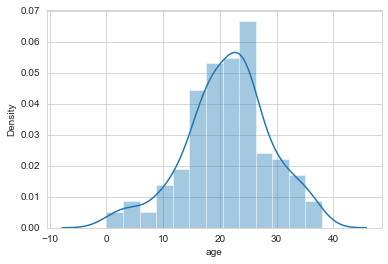

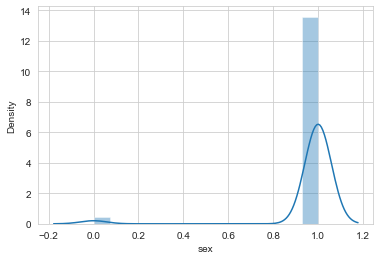

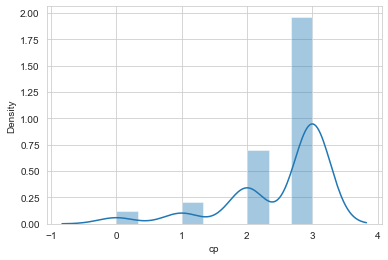

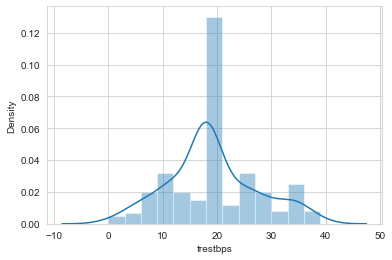

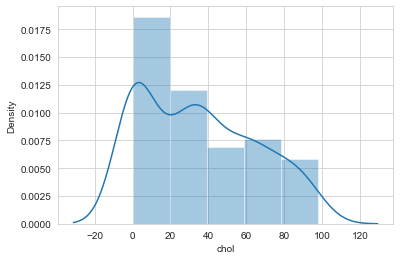

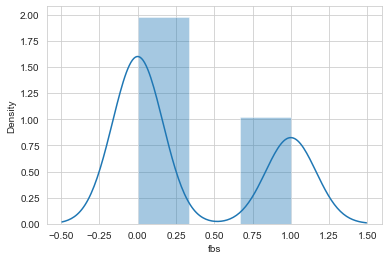

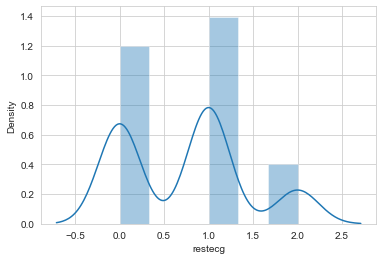

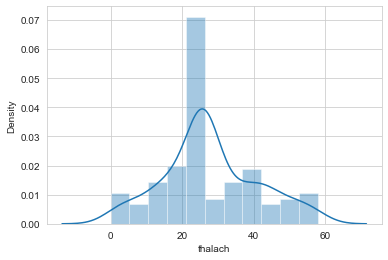

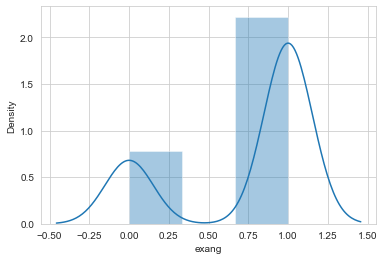

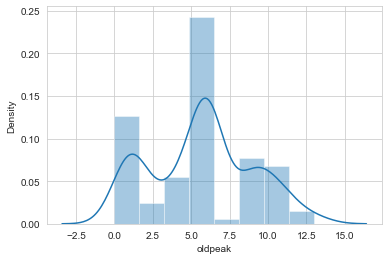

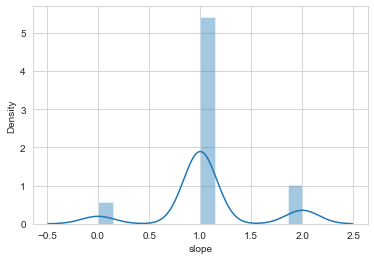

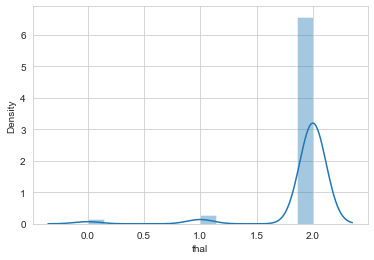

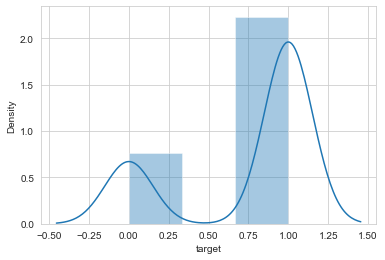

In [34]:
#Checking distribution of data using dist plot
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Highly skewed columns are not normally distributed and it is due to the presence of outliers.

Checking outliers


We can check the presence of outliers by plotting boxplot

In [35]:
collist=df.columns.values 
ncol=15
nrows=15

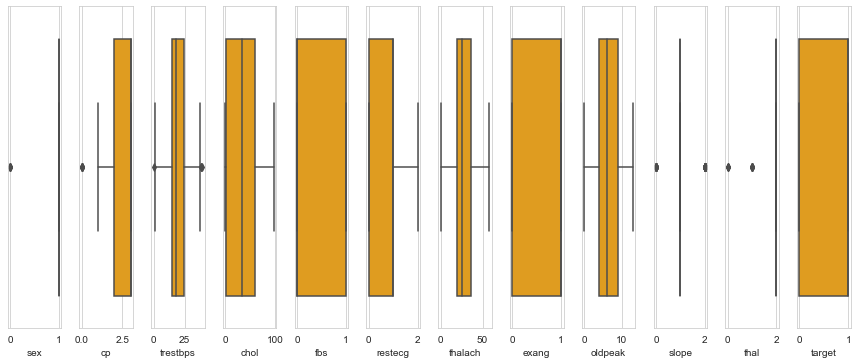

In [36]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient='v')
    plt.tight_layout()

There are outliers present in this dataset and we can remove them by using z-score method

Handling outliers using z-score method

In [37]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([ 12,  51,  66,  72,  76,  79,  97, 126, 128, 131, 133, 137, 171,
        189, 190, 194, 195, 196]),
 array([11,  1,  2,  2,  2,  1,  2,  1,  1,  2,  2,  2, 11, 11,  1, 11,  1,
         2]))

In [38]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,25,1,3,24,62,0,1,20,1,11,1,2,1
1,7,1,3,18,28,0,1,33,0,1,1,2,0
2,22,1,3,19,35,0,1,42,1,6,2,2,1
3,17,1,3,25,45,0,1,47,1,10,0,2,1
4,28,1,2,6,31,1,2,11,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,15,1,3,26,83,1,1,34,1,6,1,2,1
193,24,1,3,33,9,0,1,41,1,1,1,2,1
197,17,1,3,12,40,1,1,12,0,1,1,1,1
198,20,1,3,18,97,1,2,26,1,6,1,2,0


In [39]:
df.shape

(200, 13)

In [40]:
df_new.shape

(182, 13)

18 rows of data had outliers and they are removed by using z-score method

Preparing dataset for model training


We need to split independent and dependent variables from the dataset in order to perform further analysis

In [41]:
df_x=df_new.drop('target',axis=1)   #Independent variables
y=df_new['target']    #Dependent or Target Variable

In [42]:
#Checking x data
df_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,25,1,3,24,62,0,1,20,1,11,1,2
1,7,1,3,18,28,0,1,33,0,1,1,2
2,22,1,3,19,35,0,1,42,1,6,2,2
3,17,1,3,25,45,0,1,47,1,10,0,2
4,28,1,2,6,31,1,2,11,1,5,1,2


In [43]:
#Checking y data after splitting
y

0      1
1      0
2      1
3      1
4      0
      ..
192    1
193    1
197    1
198    0
199    1
Name: target, Length: 182, dtype: int64

Treating skewness using log transform

In [44]:
#We are removing skewness from independent variables by using log transform
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])
        
#The skewness has been treated and the data is ready for model training and testing 

Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [45]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.490181,0.0,0.625595,0.568437,0.935273,-0.701287,0.364220,-0.581462,0.573121,1.582705,-0.162221,0.214423
1,-1.946592,0.0,0.625595,-0.152507,-0.212124,-0.701287,0.364220,0.423461,-1.744834,-1.446236,-0.162221,0.214423
2,0.084052,0.0,0.625595,-0.032350,0.024105,-0.701287,0.364220,1.119176,0.573121,0.068234,1.946657,0.214423
3,-0.592829,0.0,0.625595,0.688594,0.361575,-0.701287,0.364220,1.505685,0.573121,1.279811,-2.271100,0.214423
4,0.896310,0.0,-1.024525,-1.594396,-0.110883,1.425950,1.837289,-1.277177,0.573121,-0.234660,-0.162221,0.214423
...,...,...,...,...,...,...,...,...,...,...,...,...
177,-0.863582,0.0,0.625595,0.808751,1.643960,1.425950,0.364220,0.500762,0.573121,0.068234,-0.162221,0.214423
178,0.354805,0.0,0.625595,1.649853,-0.853316,-0.701287,0.364220,1.041874,0.573121,-1.446236,-0.162221,0.214423
179,-0.592829,0.0,0.625595,-0.873452,0.192840,1.425950,0.364220,-1.199876,-1.744834,-1.446236,-0.162221,-4.663690
180,-0.186700,0.0,0.625595,-0.152507,2.116418,1.425950,1.837289,-0.117652,0.573121,0.068234,-0.162221,0.214423


Building the model

In [46]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import accuracy_score

In [47]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

Finding out the best model

We are going to use LogisticRegression, SVC, GaussianNB, DecisionTreeClassifier and KNeighborsClassifier algorithms for finding out the best model among those

In [48]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [49]:
#Initializing the instance of the model
LR=LogisticRegression()
svc=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

In [50]:
models= []
models.append(('Logistic Regression',LR))
models.append(('SupportVectorClassifier',svc))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [51]:
#Importing required modules and metrices
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.8918918918918919


cross_val_score:  0.7801801801801801


roc_auc_score:  0.7338709677419355


Classification report:
 
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.91      0.97      0.94        31

    accuracy                           0.89        37
   macro avg       0.83      0.73      0.77        37
weighted avg       0.88      0.89      0.88        37



Confusion matrix: 

[[ 3  3]
 [ 1 30]]


AUC_ROC curve:



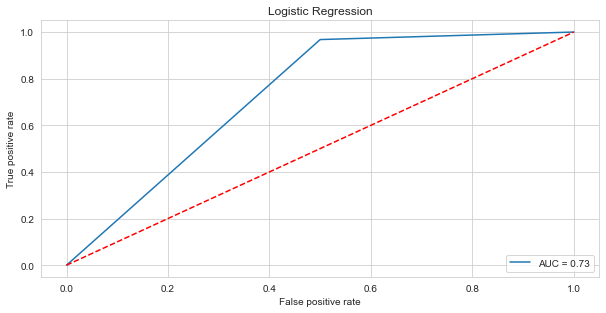





****************************** SupportVectorClassifier ***************************


SVC()


accuracy_score:  0.918918918918919


cross_val_score:  0.7855855855855856


roc_auc_score:  0.75


Classification report:
 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.91      1.00      0.95        31

    accuracy                           0.92        37
   macro avg       0.96      0.75      0.81        37
weighted avg       0.93      0.92      0.91        37



Confusion matrix: 

[[ 3  3]
 [ 0 31]]


AUC_ROC curve:



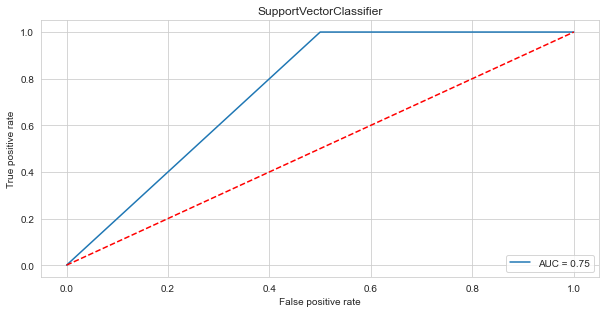





****************************** GaussianNB ***************************


GaussianNB()


accuracy_score:  0.8918918918918919


cross_val_score:  0.6527027027027028


roc_auc_score:  0.8682795698924732


Classification report:
 
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.97      0.90      0.93        31

    accuracy                           0.89        37
   macro avg       0.80      0.87      0.82        37
weighted avg       0.91      0.89      0.90        37



Confusion matrix: 

[[ 5  1]
 [ 3 28]]


AUC_ROC curve:



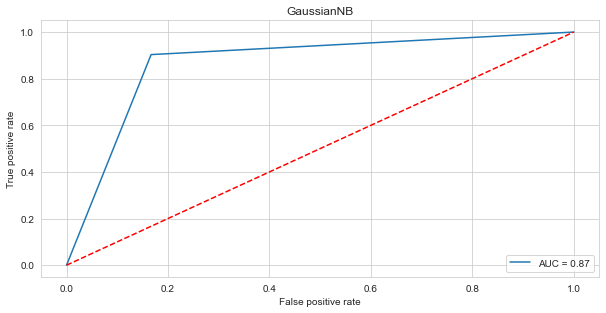





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.8108108108108109


cross_val_score:  0.7253753753753754


roc_auc_score:  0.8198924731182795


Classification report:
 
              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       0.96      0.81      0.88        31

    accuracy                           0.81        37
   macro avg       0.71      0.82      0.73        37
weighted avg       0.88      0.81      0.83        37



Confusion matrix: 

[[ 5  1]
 [ 6 25]]


AUC_ROC curve:



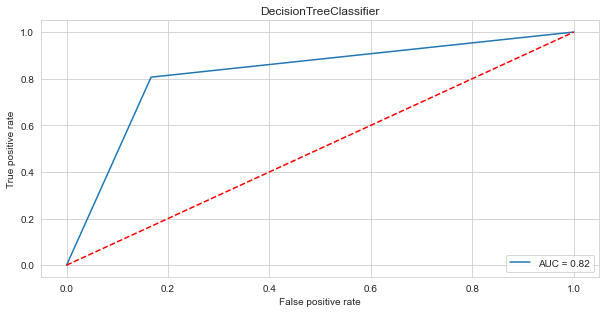





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.9459459459459459


cross_val_score:  0.7638138138138139


roc_auc_score:  0.9005376344086022


Classification report:
 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.97      0.97      0.97        31

    accuracy                           0.95        37
   macro avg       0.90      0.90      0.90        37
weighted avg       0.95      0.95      0.95        37



Confusion matrix: 

[[ 5  1]
 [ 1 30]]


AUC_ROC curve:



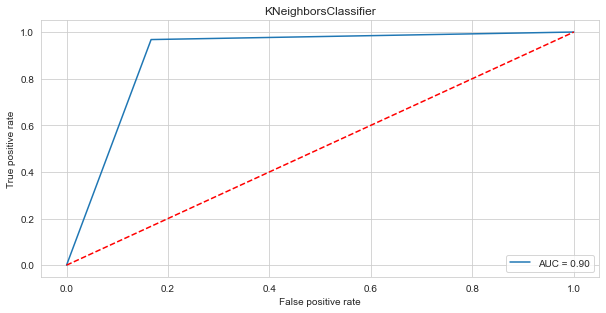

In [52]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [53]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score
0,Logistic Regression,89.189189,78.018018,73.387097
1,SupportVectorClassifier,91.891892,78.558559,75.000000
2,GaussianNB,89.189189,65.270270,86.827957
3,DecisionTreeClassifier,81.081081,72.537538,81.989247
4,KNeighborsClassifier,94.594595,76.381381,90.053763


We can see that KNeighbors Classifier is working well by giving an accuracy score of 94.5 and cross validation score of 76.3. Now we will perform hyperparameter tuning to find out the best parameters and improve the accuracy of the model.

Hyperparameter Tuning

In [54]:
#Creating parameter list to pass in GridSearchCV
parameters={'n_neighbors':range(1,30),'weights':['uniform','distance']}

In [55]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
knc=KNeighborsClassifier()
grid=GridSearchCV(knc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'n_neighbors': 13, 'weights': 'uniform'}
0.7724137931034483


In [56]:
#Using the best parameters obtained 
KNC=KNeighborsClassifier(n_neighbors=13,weights='uniform')
KNC.fit(x_train,y_train)
pred=KNC.predict(x_test)
print('Final Accuracy after tuning is: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(KNC,x,y,cv=5,scoring='accuracy').mean()*100)

Final Accuracy after tuning is:  86.48648648648648
Cross validation score:  77.46246246246247


We can see that our accuracy score got decreased after HyperParamter Tuning. For boosting the accuracy score, we can use Ensemble Techniques like RandomForestClassifier and AdaBoostClassifier

Ensemble Techniques for boosting the score

In [57]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['gini', 'entropy']}
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'gini', 'n_estimators': 50}
0.7103448275862068


In [58]:
#Using the best parameters obtained
RF=RandomForestClassifier(random_state=42,criterion='gini',n_estimators=50)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  94.5945945945946
Cross validation score:  76.9069069069069


In [59]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(random_state=42)   #Using the best random state we obtained
parameters={'n_estimators':[50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1]}
grid=GridSearchCV(adc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.001, 'n_estimators': 50}
0.7172413793103448


In [60]:
#Using the best parameters obtained
adc=AdaBoostClassifier(random_state=42,n_estimators=50,learning_rate=0.001)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adc,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  83.78378378378379
Cross validation score:  76.92192192192192


After using ensemble techniques, we can see that RandomForestClassifier is the best algorithm among all as it is giving an accuracy score of 94.59 and cross validation score of 76.90, after using the best parameters obtained.

Finalizing the model

In [61]:
RF_prediction=RF.predict(x)
print('Predictions of RandomForest Classifier: ',RF_prediction)

Predictions of RandomForest Classifier:  [1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1]


In [62]:
#Saving the model
import joblib
joblib.dump(RF,'Heart_Disease_Project.pkl')

['Heart_Disease_Project.pkl']

Saving the predicted values

In [63]:
results=pd.DataFrame(RF_prediction)
results.to_csv('HeartDisease_Project_Results.csv')

Conclusion
-> After getting an insight of this dataset, we came to see that the people are diagnosed with heart diseases on the basis of various parmeters.

-> After analyzing the dataset, we plotted graphs based on various parameters and from the graph we saw that female patients with high age were more severe than the male patients.

-> We also obsereved that the people aged above 60 is on high risk for getting heart diseases and we also observed that the people who has cholestrol level above 200 are at high risk of getting diagnosed with heart disease.

->We saw that the people who have normal defect are getting maximum heart rates and being diagonsed.

->We tried to reduced skewness, worked on missing values and removed the outliers for getting the better result of model.

->We applied lots of Classification models and came to a conclusion that the Kneighbors was working well and we tried to improve the accuracy of the model by finding the best parameter using Hyperparameter Tuning technique.

->After applying GridSearchCV, our scores were not increased and because of that we applied various ensemble techniques to boost our scores.

->By applying Ensemble Techniques, we got RandomForestClassifier as the best model among all as it gave an accuracy score of 94.5 and cross validation score of 76.9, which is quite good for this dataset.

->We finalized the model by finding the predicted values and saving the model in a pickle file. Then we saved the predicted results in a csv file.

->But we can improve the dataset by adding less skewed data, less outliers, more positive correlated data with the target variable, having less missing data, etc inorder to achieve good scores.

->Overall this dataset helped us to know about the reasons for getting heart diseases and also it was a good dataset to predict the presence of heart diseases.